### Import necessary libraries

In [3]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Load the dataset

In [5]:
data = pd.read_csv("StockData.csv")
data.head()

,Unnamed: 0,Date,Open,High,Low,Close
0,0,3/27/2018,173.68,175.15,166.92,168.340
1,1,3/26/2018,168.07,173.10,166.44,172.770
2,2,3/23/2018,168.39,169.92,164.94,164.940
3,3,3/22/2018,170.00,172.68,168.60,168.845
4,4,3/21/2018,175.04,175.09,171.26,171.270


### Data Preprocessing

In [6]:
# Prepare Target Variable (Tomorrow's Closing Price)
data['Tomorrow_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)  # Drop rows with NaN target due to the shift

# Define features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Close']]
y = data['Tomorrow_Close']

### 1. Linear Regression with Cross-Validation


Linear Regression - Average MSE across folds: 37.05
Linear Regression - Average MAE across folds: 0.84
Linear Regression - Average R² across folds: 1.00


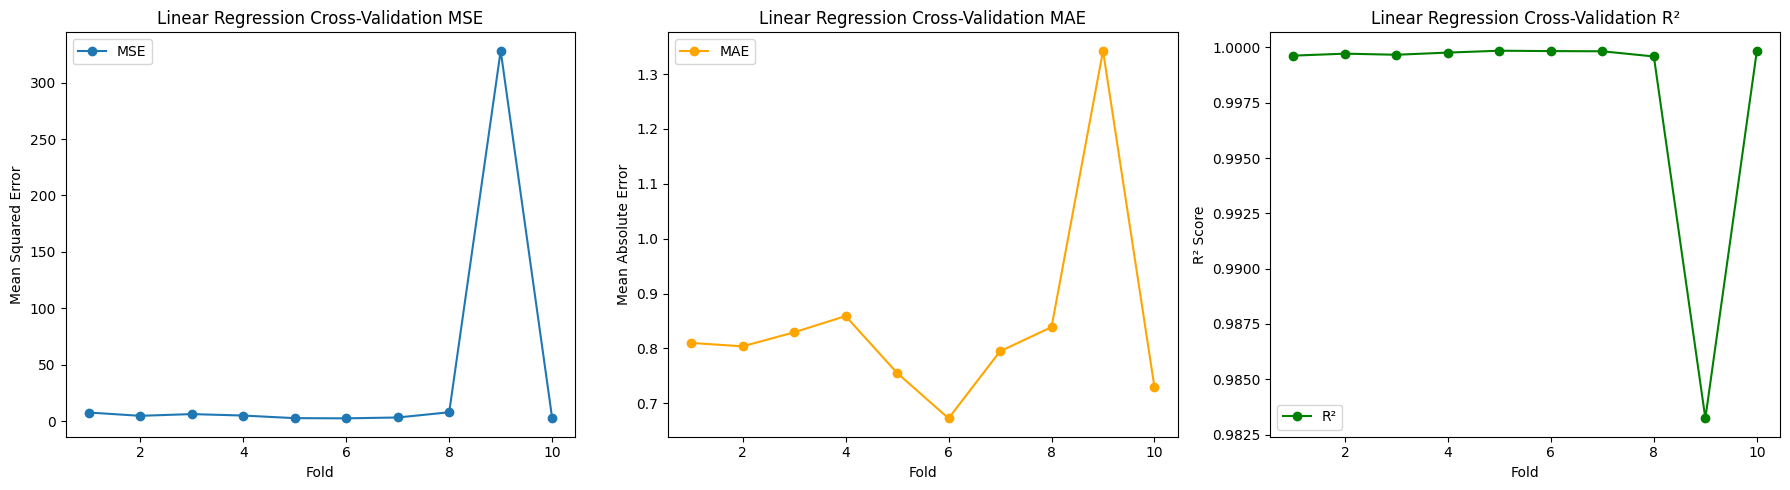

In [7]:
# Initialize the Linear Regression model and cross-validation
model_lr = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for Linear Regression
mse_scores_lr = []
mae_scores_lr = []
r2_scores_lr = []  # To store R² scores

# Cross-validation with Linear Regression
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model_lr.fit(X_train, y_train)
    y_pred = model_lr.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = model_lr.score(X_test, y_test)  # R² score calculation

    mse_scores_lr.append(mse)
    mae_scores_lr.append(mae)
    r2_scores_lr.append(r2)

# Average metrics across folds for Linear Regression
average_mse_lr = np.mean(mse_scores_lr)
average_mae_lr = np.mean(mae_scores_lr)
average_r2_lr = np.mean(r2_scores_lr)

print(f"\nLinear Regression - Average MSE across folds: {average_mse_lr:.2f}")
print(f"Linear Regression - Average MAE across folds: {average_mae_lr:.2f}")
print(f"Linear Regression - Average R² across folds: {average_r2_lr:.2f}")

# Plotting MSE, MAE, and R² for Linear Regression
plt.figure(figsize=(18, 5))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(range(1, 11), mse_scores_lr, marker='o', label='MSE')
plt.title('Linear Regression Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.legend()

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(range(1, 11), mae_scores_lr, marker='o', color='orange', label='MAE')
plt.title('Linear Regression Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(range(1, 11), r2_scores_lr, marker='o', color='green', label='R²')
plt.title('Linear Regression Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.legend()

plt.tight_layout()
plt.show()


### 2. Random Forest Regression with Cross-Validation


Random Forest - Average MSE across folds: 41.00
Random Forest - Average MAE across folds: 1.03
Random Forest - Average R² across folds: 1.00


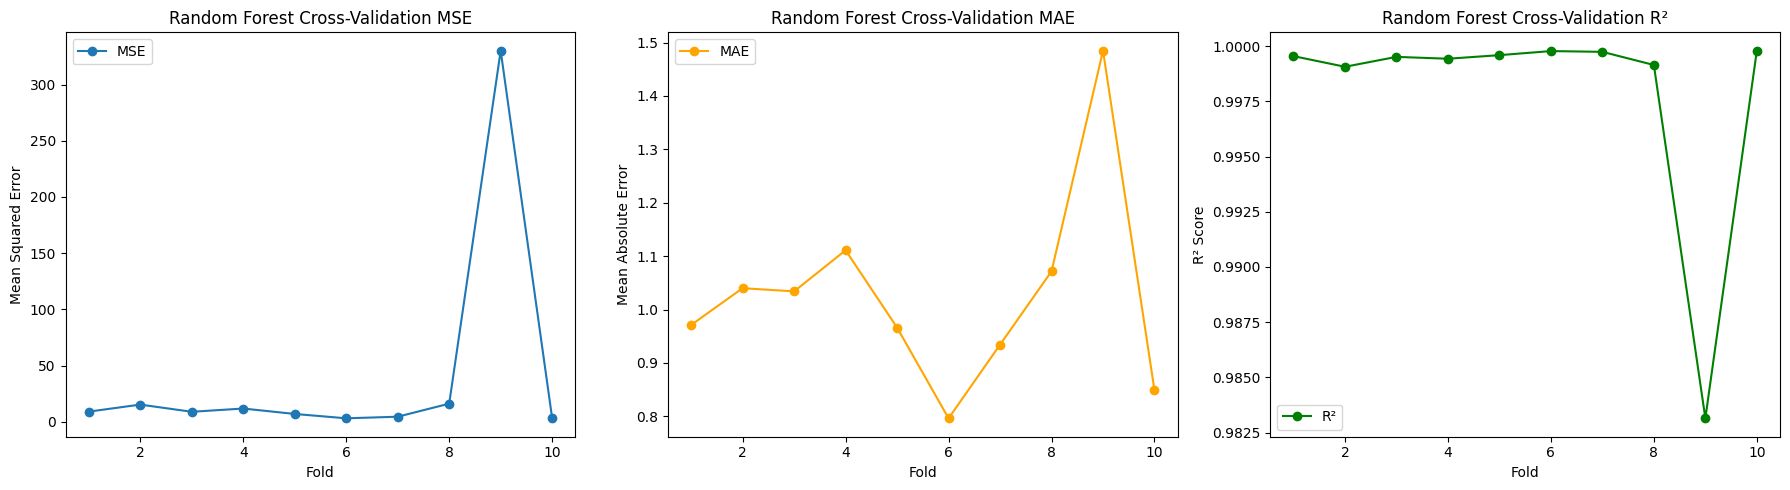

In [8]:
# Initialize Random Forest model and cross-validation
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for Random Forest
mse_scores_rf = []
mae_scores_rf = []
r2_scores_rf = []  # To store R² scores

# Cross-validation with Random Forest
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = model_rf.score(X_test, y_test)  # R² score calculation

    mse_scores_rf.append(mse)
    mae_scores_rf.append(mae)
    r2_scores_rf.append(r2)

# Average metrics across folds for Random Forest
average_mse_rf = np.mean(mse_scores_rf)
average_mae_rf = np.mean(mae_scores_rf)
average_r2_rf = np.mean(r2_scores_rf)

print(f"\nRandom Forest - Average MSE across folds: {average_mse_rf:.2f}")
print(f"Random Forest - Average MAE across folds: {average_mae_rf:.2f}")
print(f"Random Forest - Average R² across folds: {average_r2_rf:.2f}")

# Plotting MSE, MAE, and R² for Random Forest
plt.figure(figsize=(18, 5))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(range(1, 11), mse_scores_rf, marker='o', label='MSE')
plt.title('Random Forest Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.legend()

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(range(1, 11), mae_scores_rf, marker='o', color='orange', label='MAE')
plt.title('Random Forest Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(range(1, 11), r2_scores_rf, marker='o', color='green', label='R²')
plt.title('Random Forest Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.legend()

plt.tight_layout()
plt.show()


### 3. Gradiant Boosting Regression with Cross-validation

Gradient Boosting - Fold 1 - MSE: 9.30, MAE: 1.12, R²: 1.00
Gradient Boosting - Fold 2 - MSE: 30.66, MAE: 1.28, R²: 1.00
Gradient Boosting - Fold 3 - MSE: 8.04, MAE: 1.21, R²: 1.00
Gradient Boosting - Fold 4 - MSE: 18.38, MAE: 1.29, R²: 1.00
Gradient Boosting - Fold 5 - MSE: 4.31, MAE: 1.10, R²: 1.00
Gradient Boosting - Fold 6 - MSE: 4.65, MAE: 1.06, R²: 1.00
Gradient Boosting - Fold 7 - MSE: 4.83, MAE: 1.16, R²: 1.00
Gradient Boosting - Fold 8 - MSE: 10.07, MAE: 1.20, R²: 1.00
Gradient Boosting - Fold 9 - MSE: 329.96, MAE: 1.70, R²: 0.98
Gradient Boosting - Fold 10 - MSE: 4.13, MAE: 1.09, R²: 1.00

Gradient Boosting - Average MSE across folds: 42.43
Gradient Boosting - Average MAE across folds: 1.22
Gradient Boosting - Average R² across folds: 1.00


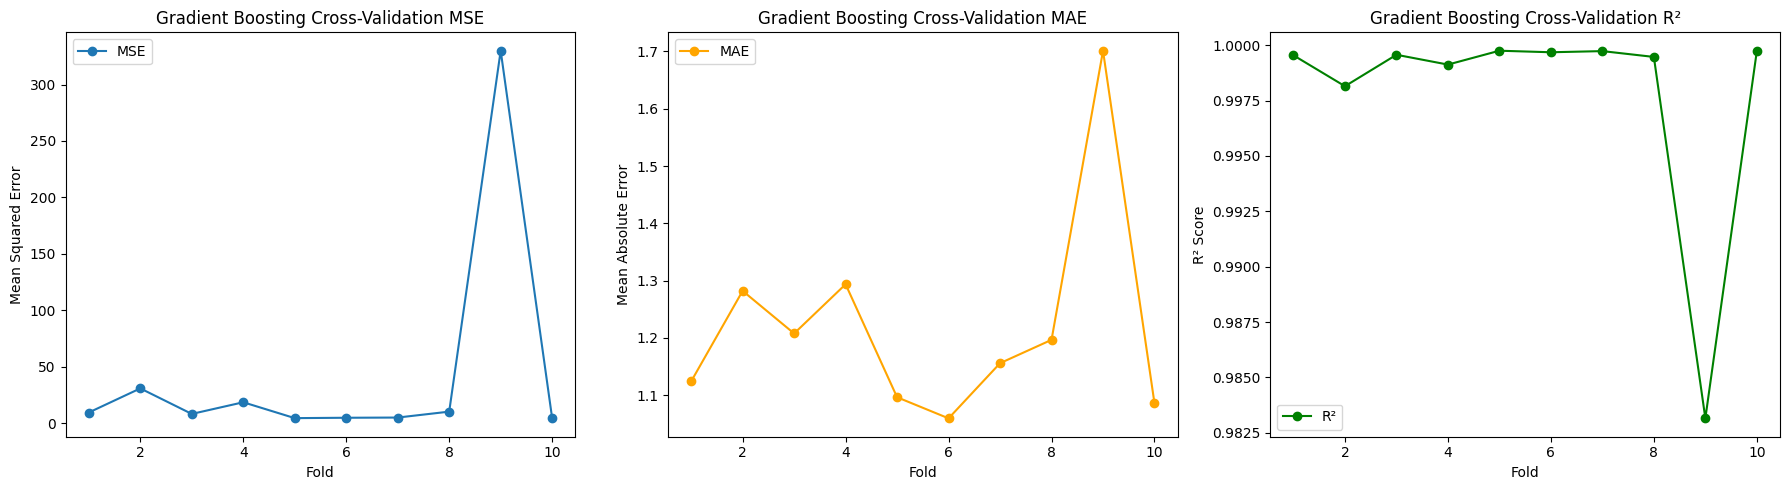

In [9]:
# Initialize Gradient Boosting Regressor and KFold for cross-validation
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for Gradient Boosting
mse_scores_gb = []
mae_scores_gb = []
r2_scores_gb = []  # To store R² scores

# Cross-validation with Gradient Boosting
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model_gb.fit(X_train, y_train)
    y_pred = model_gb.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = model_gb.score(X_test, y_test)  # R² score calculation

    mse_scores_gb.append(mse)
    mae_scores_gb.append(mae)
    r2_scores_gb.append(r2)

    print(f"Gradient Boosting - Fold {fold} - MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")
    fold += 1

# Average metrics across folds for Gradient Boosting
average_mse_gb = np.mean(mse_scores_gb)
average_mae_gb = np.mean(mae_scores_gb)
average_r2_gb = np.mean(r2_scores_gb)

print(f"\nGradient Boosting - Average MSE across folds: {average_mse_gb:.2f}")
print(f"Gradient Boosting - Average MAE across folds: {average_mae_gb:.2f}")
print(f"Gradient Boosting - Average R² across folds: {average_r2_gb:.2f}")

# Plotting MSE, MAE, and R² for Gradient Boosting
plt.figure(figsize=(18, 5))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(range(1, 11), mse_scores_gb, marker='o', label='MSE')
plt.title('Gradient Boosting Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.legend()

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(range(1, 11), mae_scores_gb, marker='o', color='orange', label='MAE')
plt.title('Gradient Boosting Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Plot R²
plt.subplot(1, 3, 3)
plt.plot(range(1, 11), r2_scores_gb, marker='o', color='green', label='R²')
plt.title('Gradient Boosting Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.legend()

plt.tight_layout()
plt.show()


### 4. LSTM Model

In [ ]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for as


In [ ]:
# importing important libreries for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'tf'

In [ ]:
data_close = data[['Close']].values

# Scale the data to a 0-1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_close)

# Define the sequence length (e.g., 60 days of history to predict the next day)
sequence_length = 60

# Prepare sequences and corresponding targets
X_lstm, y_lstm = [], []
for i in range(sequence_length, len(scaled_data)):
    X_lstm.append(scaled_data[i-sequence_length:i, 0])
    y_lstm.append(scaled_data[i, 0])

# Convert to NumPy arrays and reshape for LSTM input (samples, time steps, features)
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))


In [ ]:
# Define train/test split
split_ratio = 0.8
split_index = int(len(X_lstm) * split_ratio)

X_train, X_test = X_lstm[:split_index], X_lstm[split_index:]
y_train, y_test = y_lstm[:split_index], y_lstm[split_index:]


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step - loss: 0.0079 - val_loss: 2.5196e-05
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - loss: 6.2937e-04 - val_loss: 1.6266e-05
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 3.9883e-04 - val_loss: 4.4205e-05
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 2.1898e-04 - val_loss: 4.3105e-05
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 4.7292e-04 - val_loss: 1.0049e-05
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - loss: 4.4572e-04 - val_loss: 4.0851e-05
Epoch 7/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 1.2482e-04 - val_loss: 1.4107e-05
Epoch 8/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 1.2208e-04 - val_loss: 2.4578e-05
Epoch 9/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - loss: 7.5361e-05 - val_loss: 7.8859e-06
Epoch 10/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 1.3857e-04 - val_loss: 7.6567e-06
Epoch 11/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 2

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
Test MSE: 2.60
Test MAE: 1.05
Test R²: 0.99


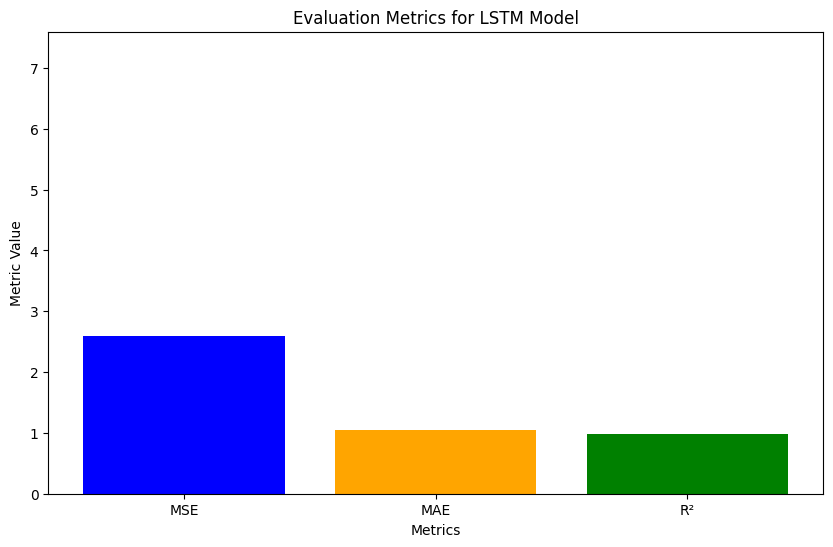

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Reverse scaling to get actual prices for y_test and y_pred
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
# rmse = np.sqrt(mse)
# mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print evaluation metrics
print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
# print(f"Test RMSE: {rmse:.2f}")
# print(f"Test MAPE: {mape:.2f}%")
print(f"Test R²: {r2:.2f}")

# Plot evaluation metrics
metrics = ['MSE', 'MAE', 'R²']
values = [mse, mae, r2]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.title('Evaluation Metrics for LSTM Model')
plt.ylabel('Metric Value')
plt.xlabel('Metrics')
plt.ylim(0, max(values) + 5)  # Adjust y-axis for better visualization
plt.show()

# Plot Actual vs Predicted Closing Prices
# plt.figure(figsize=(12, 6))
# plt.plot(y_test_rescaled, label="Actual Closing Prices", color="blue")
# plt.plot(y_pred_rescaled, label="Predicted Closing Prices", color="red", linestyle="--")
# plt.title("LSTM Model - Actual vs Predicted Closing Prices on Test Set")
# plt.xlabel("Sample")
# plt.ylabel("Closing Price")
# plt.legend()
# plt.show()


### Comparison of Average MSE and MAE Between Models

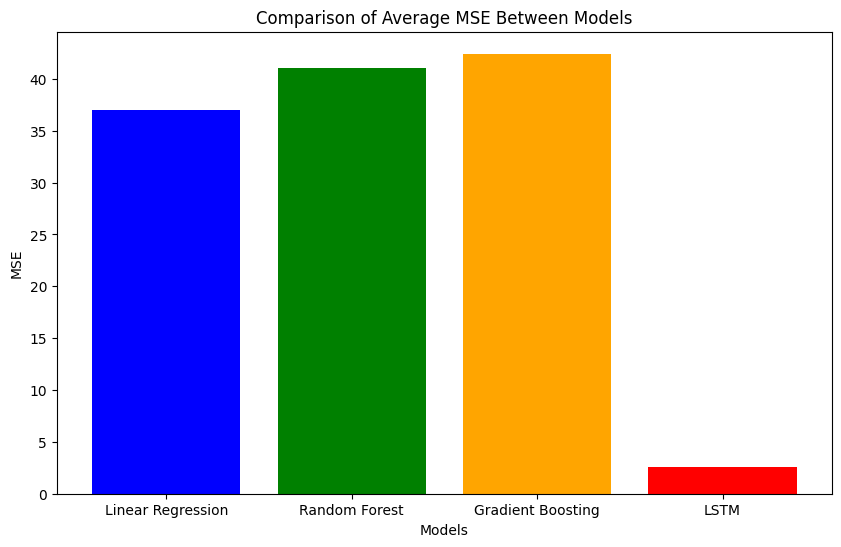

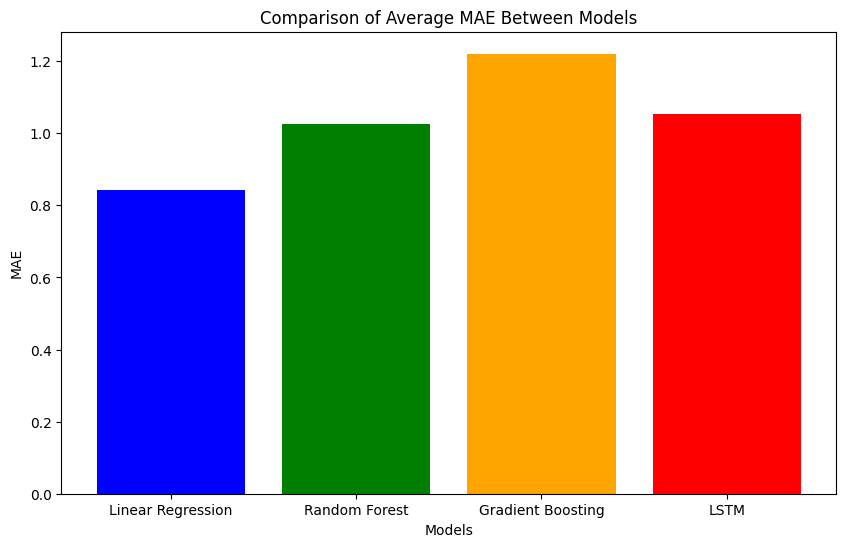

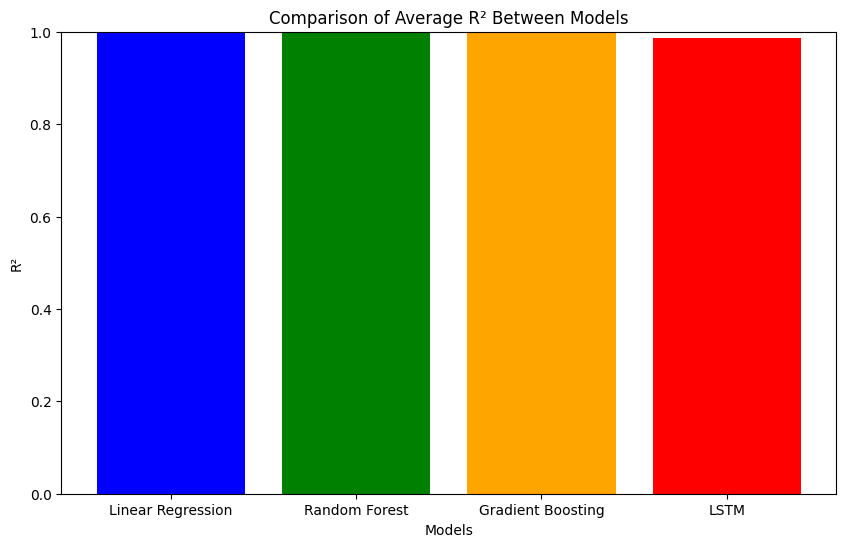

In [ ]:
# Metrics for each model
linear_regression_metrics = [average_mse_lr, average_mae_lr, average_r2_lr]
random_forest_metrics = [average_mse_rf, average_mae_rf, average_r2_rf]
gradient_boosting_metrics = [average_mse_gb, average_mae_gb, average_r2_gb]
lstm_metrics = [mse, mae, r2]  # LSTM metrics

# Model names
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'LSTM']

# Plot 1: Average MSE
plt.figure(figsize=(10, 6))
mse_values = [average_mse_lr, average_mse_rf, average_mse_gb, mse]
plt.bar(models, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Comparison of Average MSE Between Models')
plt.ylabel('MSE')
plt.xlabel('Models')
plt.show()

# Plot 2: Average MAE
plt.figure(figsize=(10, 6))
mae_values = [average_mae_lr, average_mae_rf, average_mae_gb, mae]
plt.bar(models, mae_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Comparison of Average MAE Between Models')
plt.ylabel('MAE')
plt.xlabel('Models')
plt.show()

# Plot 3: Average R²
plt.figure(figsize=(10, 6))
r2_values = [average_r2_lr, average_r2_rf, average_r2_gb, r2]
plt.bar(models, r2_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Comparison of Average R² Between Models')
plt.ylabel('R²')
plt.xlabel('Models')
plt.ylim(0, 1)  # Optional: Limit R² to 0-1 for better visualization
plt.show()


### Bias and Variance

In [ ]:
# Ensure correct shapes and datasets
X_test_tabular = X.iloc[test_index]  # Use 2D tabular data for traditional models
X_test_lstm = X_test  # Use 3D reshaped data for LSTM

def calculate_bias_variance(y_true, y_pred):
    # Calculate mean of predictions
    y_pred_mean = np.mean(y_pred)

    # Calculate Bias (Squared)
    bias_squared = np.mean((y_true - y_pred_mean) ** 2)

    # Calculate Variance
    variance = np.mean((y_pred - y_pred_mean) ** 2)

    return bias_squared, variance

# Linear Regression Bias-Variance
bias_lr, variance_lr = calculate_bias_variance(y_test, model_lr.predict(X_test_tabular))
print(f"Linear Regression - Bias^2: {bias_lr:.4f}, Variance: {variance_lr:.4f}")

# Random Forest Bias-Variance
bias_rf, variance_rf = calculate_bias_variance(y_test, model_rf.predict(X_test_tabular))
print(f"Random Forest - Bias^2: {bias_rf:.4f}, Variance: {variance_rf:.4f}")

# Gradient Boosting Bias-Variance
bias_gb, variance_gb = calculate_bias_variance(y_test, model_gb.predict(X_test_tabular))
print(f"Gradient Boosting - Bias^2: {bias_gb:.4f}, Variance: {variance_gb:.4f}")

# LSTM Bias-Variance
bias_lstm, variance_lstm = calculate_bias_variance(y_test_rescaled, y_pred_rescaled)
print(f"LSTM - Bias^2: {bias_lstm:.4f}, Variance: {variance_lstm:.4f}")


Linear Regression - Bias^2: 9307.3494, Variance: 15854.8362
Random Forest - Bias^2: 9285.5265, Variance: 15833.8916
Gradient Boosting - Bias^2: 9291.3767, Variance: 15849.5829
LSTM - Bias^2: 190.9135, Variance: 183.5607


### Compare and Select the Best Model

In [ ]:
# Determine the best model based on the lowest average MSE
if average_mse_rf < average_mse_lr and average_mse_rf < average_mse_gb and average_mse_rf < mse:
    best_model = model_rf
    print("\nSelected Model: Random Forest Regression")
elif average_mse_gb < average_mse_lr and average_mse_gb < average_mse_rf and average_mse_gb < mse:
    best_model = model_gb
    print("\nSelected Model: Gradient Boosting Regression")
elif mse < average_mse_lr and mse < average_mse_rf and mse < average_mse_gb:
    print(mse, average_mse_lr, average_mse_rf, average_mae_gb)
    best_model = model  # Assuming `model` is the LSTM model
    print("\nSelected Model: LSTM")
else:
    best_model = model_lr
    print("\nSelected Model: Linear Regression")


2.5962756657593493 37.04797446451934 41.01629642171448 1.2203835422118967

Selected Model: LSTM


### Train the Best Model on the Entire Dataset and Make Final Predictions

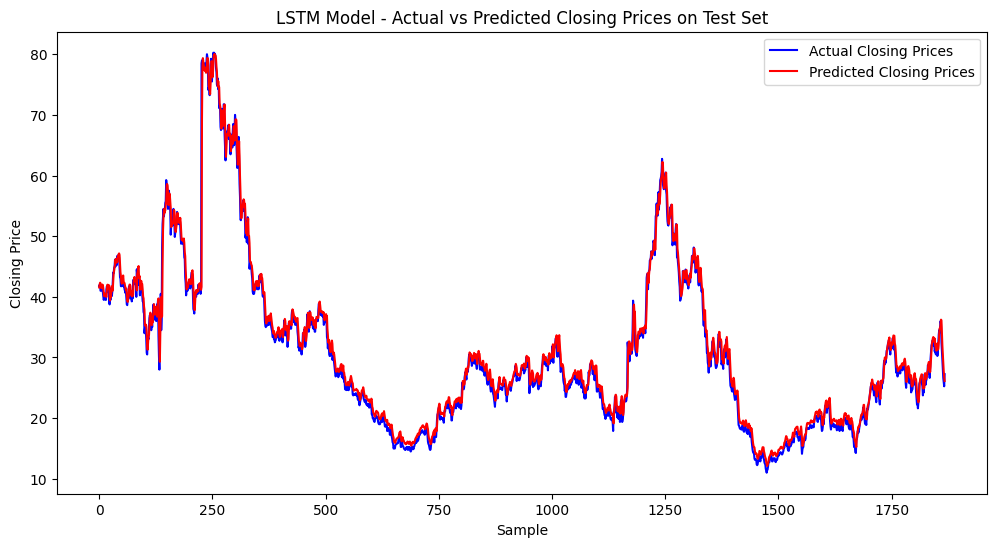

In [ ]:
from sklearn.model_selection import train_test_split

if best_model == model:
  # Plot Actual vs Predicted Closing Prices
  plt.figure(figsize=(12, 6))
  plt.plot(y_test_rescaled, label="Actual Closing Prices", color="blue")
  plt.plot(y_pred_rescaled, label="Predicted Closing Prices", color="red", linestyle="-")
  plt.title("LSTM Model - Actual vs Predicted Closing Prices on Test Set")
  plt.xlabel("Sample")
  plt.ylabel("Closing Price")
  plt.legend()
  plt.show()

else:
  # Step 1: Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train the best model on the training set
  best_model.fit(X_train, y_train)

  # Step 2: Make predictions on the test set
  y_pred = best_model.predict(X_test)

  # Step 3: Evaluate the model on the test set
  mse_test = mean_squared_error(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)
  print(f"Test MSE: {mse_test:.2f}")
  print(f"Test MAE: {mae_test:.2f}")

  # Step 4: Plot Actual vs Predicted Closing Prices
  plt.figure(figsize=(12, 6))
  plt.plot(y_test.values, label="Actual Closing Prices", color="blue")
  plt.plot(y_pred, label="Predicted Closing Prices", color="green", linestyle="-")
  plt.title("Actual vs Predicted Closing Prices on Test Set")
  plt.xlabel("Sample")
  plt.ylabel("Closing Price")
  plt.legend()
  plt.show()


In [ ]:
# from sklearn.model_selection import train_test_split

# # Step 1: Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the best model on the training set
# model_lr.fit(X_train, y_train)
# model_rf.fit(X_train, y_train)

# # Step 2: Make predictions on the test set
# y_pred_lr = model_lr.predict(X_test)
# y_pred_rf = model_rf.predict(X_test)
# y_pred_gb = model_gb.predict(X_test)

# # Evaluate Linear Regression on the test set
# mse_test_lr = mean_squared_error(y_test, y_pred_lr)
# mae_test_lr = mean_absolute_error(y_test, y_pred_lr)
# print(f"Test MSE Linear: {mse_test_lr:.2f}")
# print(f"Test MAE Linear: {mae_test_lr:.2f}")

# # Evaluate Random Forrest on the test set
# mse_test_rf = mean_squared_error(y_test, y_pred_rf)
# mae_test_rf = mean_absolute_error(y_test, y_pred_rf)
# print(f"Test MSE Random forest: {mse_test_rf:.2f}")
# print(f"Test MAE Random forest: {mae_test_rf:.2f}")

# # Evaluate Gradient Boosting on the test set
# mse_test_gb = mean_squared_error(y_test, y_pred_gb)
# mae_test_gb = mean_absolute_error(y_test, y_pred_gb)
# print(f"Test MSE (Gradient Boosting): {mse_test_gb:.2f}")
# print(f"Test MAE (Gradient Boosting): {mae_test_gb:.2f}")

# # Step 4: Plot Actual vs Predicted Closing Prices
# plt.figure(figsize=(12, 6))
# plt.plot(y_test.values, label="Actual Closing Prices", color="blue")
# plt.plot(y_pred_lr, label="Predicted Closing Prices", color="green", linestyle="-")
# plt.title("Actual vs Predicted Closing Prices on Test Set - Linear")
# plt.xlabel("Sample")
# plt.ylabel("Closing Price")
# plt.legend()
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(y_test.values, label="Actual Closing Prices", color="blue")
# plt.plot(y_pred_rf, label="Predicted Closing Prices", color="green", linestyle="-")
# plt.title("Actual vs Predicted Closing Prices on Test Set - Random Forest")
# plt.xlabel("Sample")
# plt.ylabel("Closing Price")
# plt.legend()
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(y_test.values, label="Actual Closing Prices", color="blue")
# plt.plot(y_pred_gb, label="Predicted Closing Prices", color="red", linestyle="--")
# plt.title("Actual vs Predicted Closing Prices on Test Set - Gradiant Boosting")
# plt.xlabel("Sample")
# plt.ylabel("Closing Price")
# plt.legend()
# plt.show()